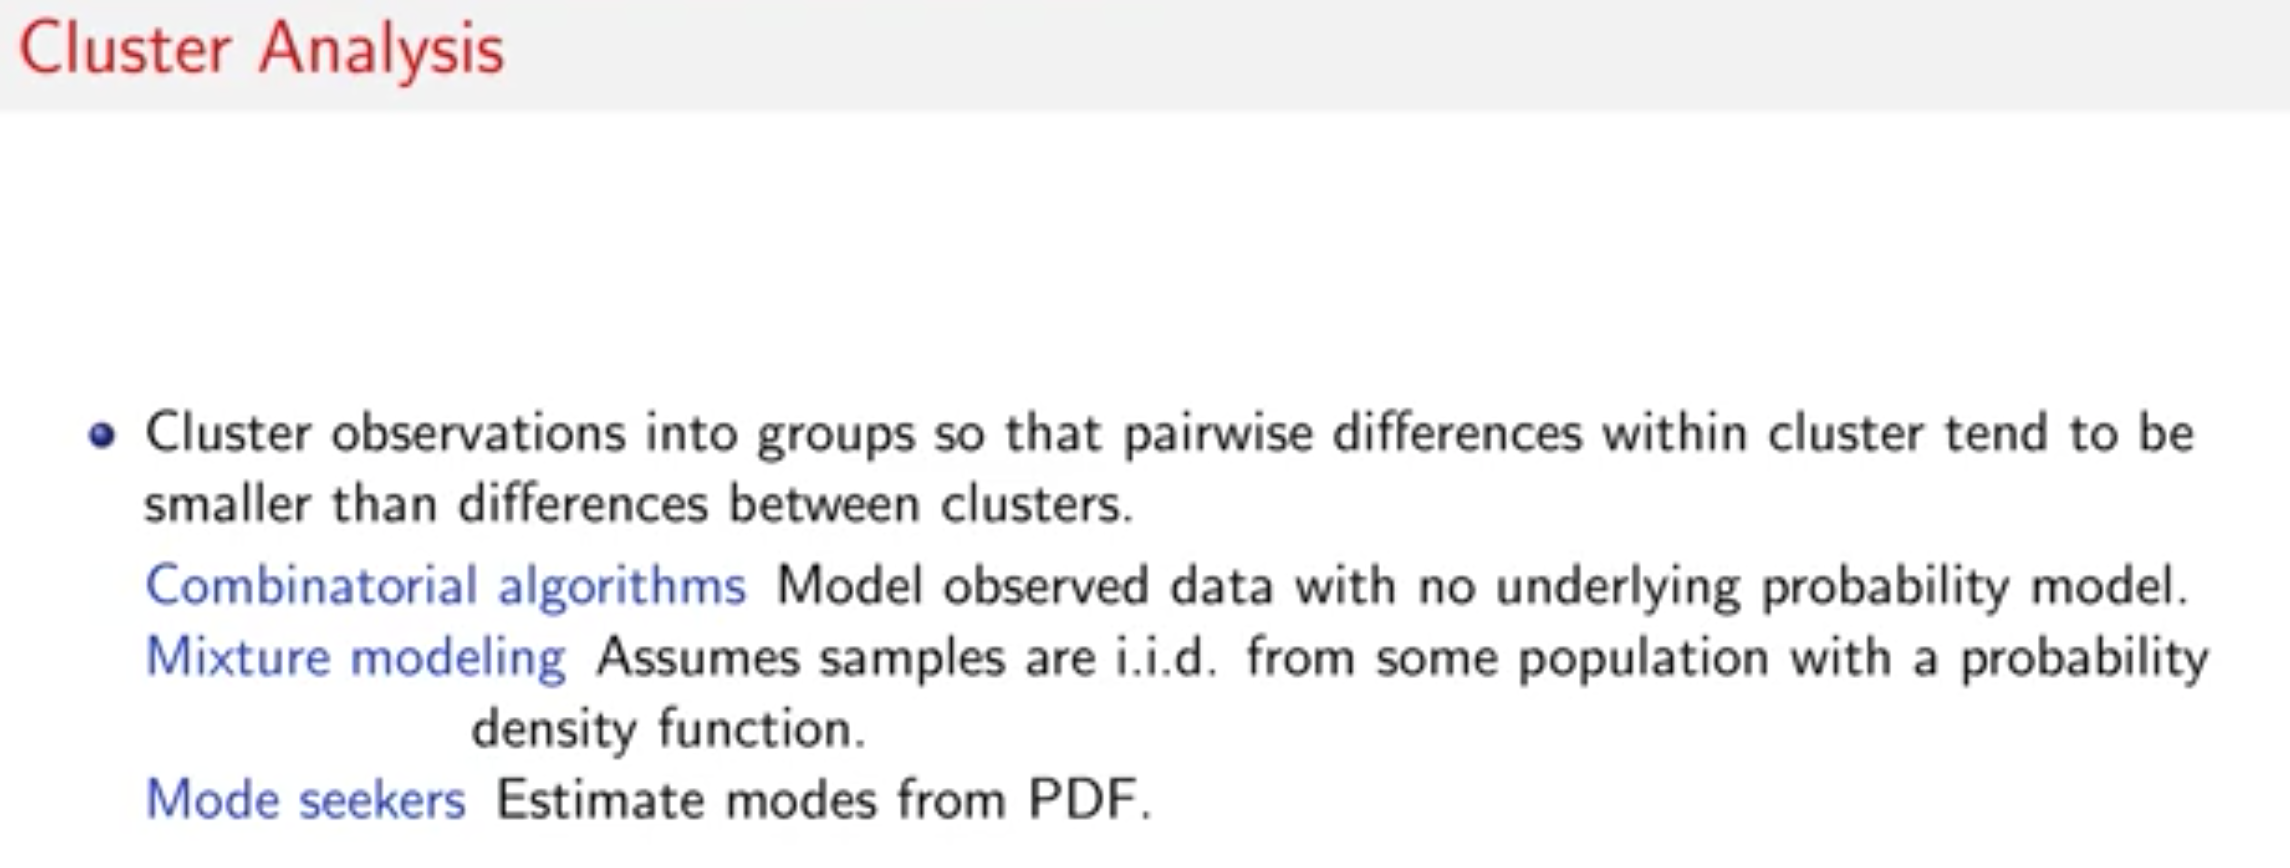

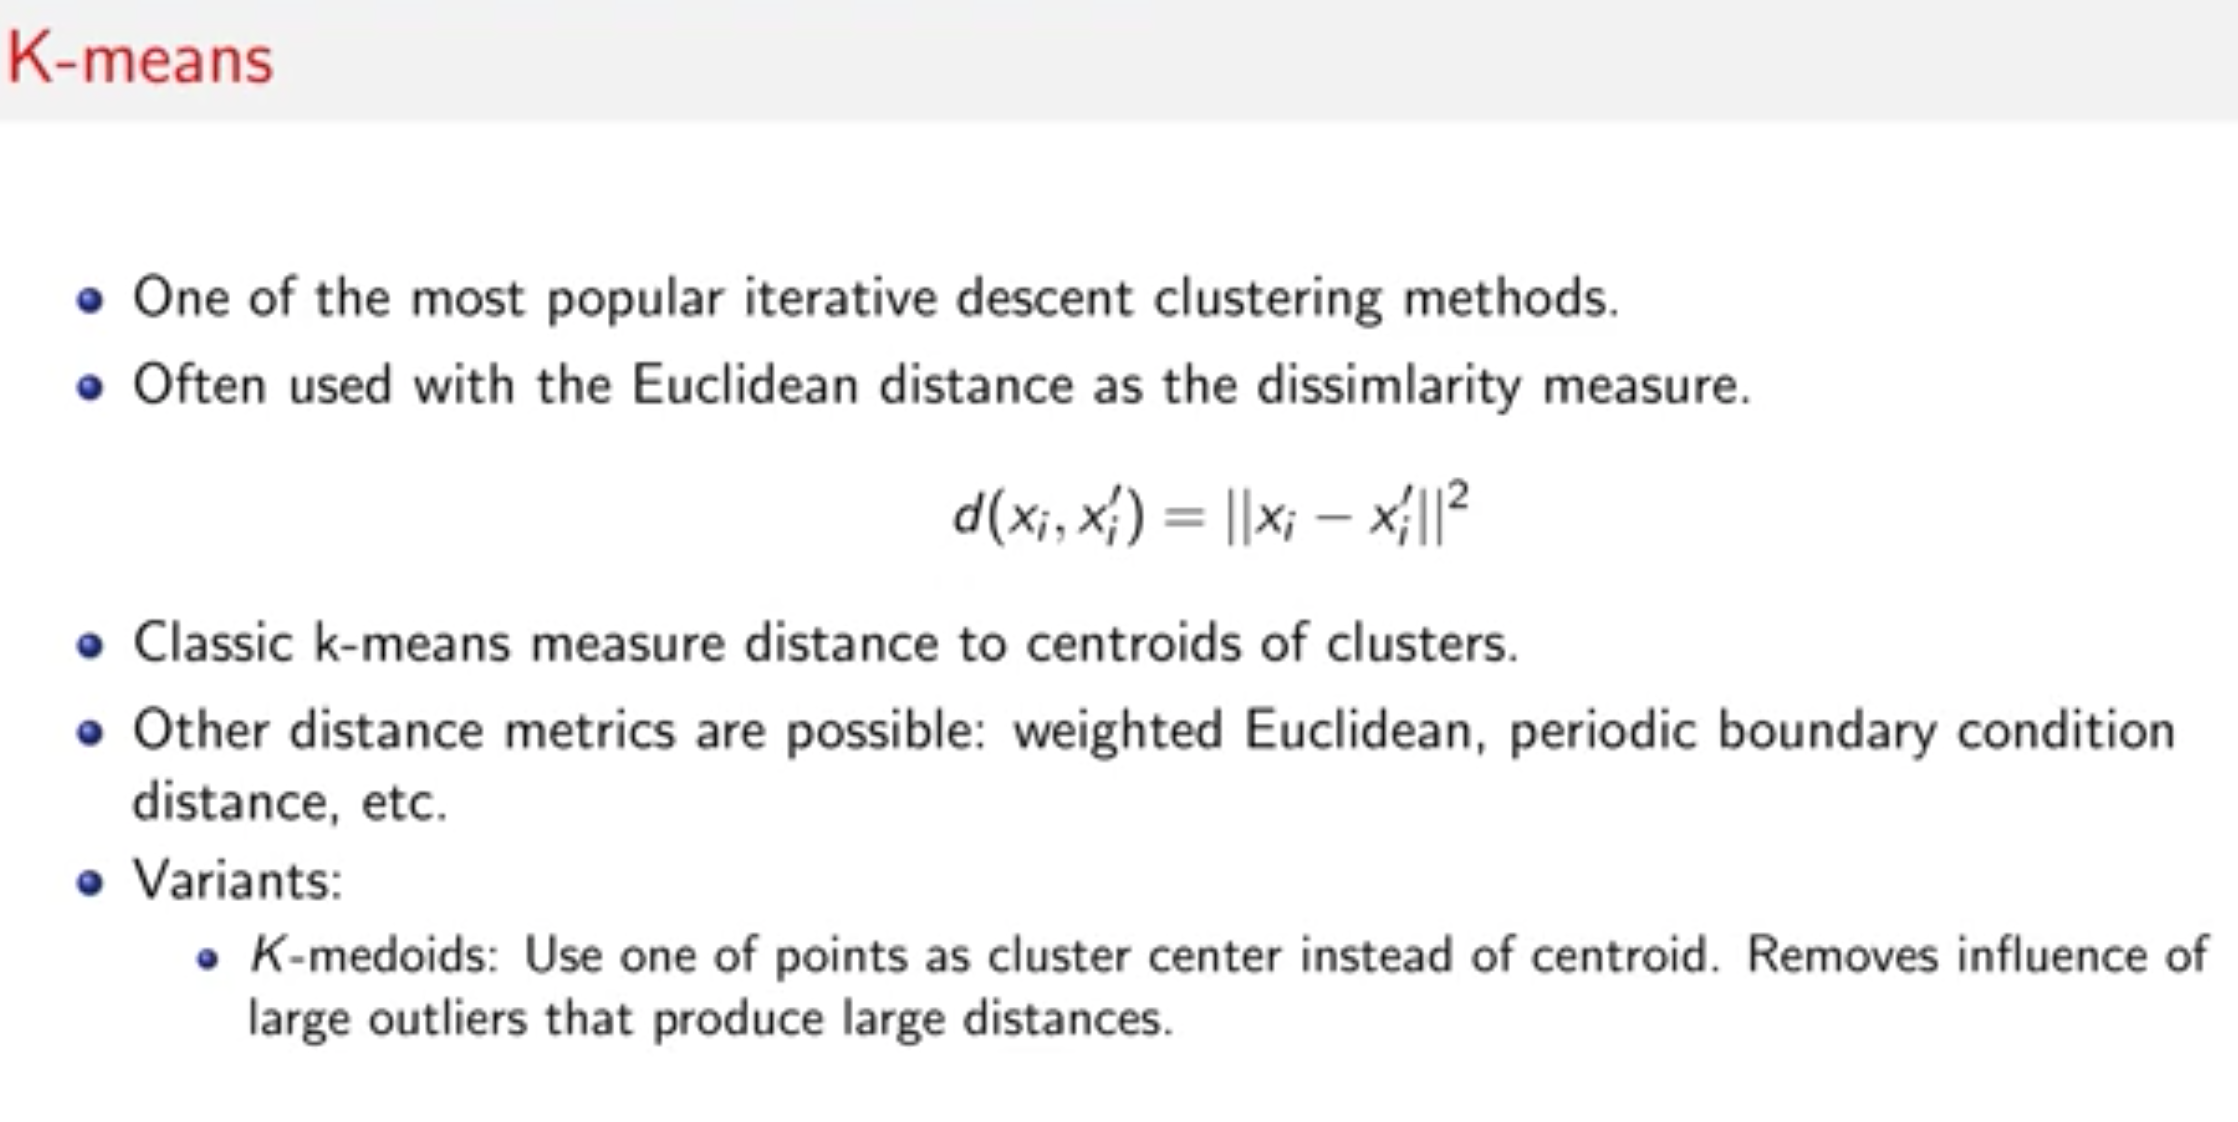

In [3]:
# Clustering
import pandas as pd
import seaborn as sns
import numpy as np
 
import matplotlib as mpl
import matplotlib.pyplot as plt

params = {'legend.fontsize': 20,
          'figure.figsize': (12,8),
          'axes.labelsize': 20,
          'axes.titlesize': 24,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16}
mpl.rcParams.update(params)

%matplotlib inline


In [4]:
data = np.loadtxt('3_gaussians.txt')
print(data)

[[ 2.80146103e-01  4.14659372e-02]
 [ 8.89461153e-01 -2.40279063e-01]
 [ 1.00078626e+00  1.45447445e+00]
 [ 1.10983765e+00 -8.76702305e-01]
 [-2.81185691e-01  2.19414024e+00]
 [-5.00053803e-01 -1.71943297e-01]
 [-1.76607676e-01 -2.62795637e-01]
 [-6.58872881e-01 -8.25721925e-01]
 [ 8.75426347e-01 -4.83997299e-01]
 [ 7.74106850e-01 -1.13894057e-01]
 [ 9.85706682e-01 -2.04500048e-01]
 [-1.86813213e-01  8.21134816e-01]
 [-2.13193151e-02 -9.66157591e-01]
 [-4.06249680e-01  2.54226616e-01]
 [ 4.10594928e-03  6.19075824e-01]
 [-1.29807882e+00 -5.74409004e-01]
 [-7.74785139e-01 -7.16751317e-02]
 [-4.44232885e-01 -6.66860355e-01]
 [-2.44696693e-01 -3.75497618e-01]
 [ 1.08017246e+00 -1.46384017e-01]
 [ 3.66325204e-01  5.67971273e-02]
 [-4.09111233e-01  8.37317519e-01]
 [-8.26754328e-01  8.74815218e-01]
 [ 2.88528699e-01  3.92047882e-01]
 [ 4.47279624e-01 -1.15494952e-01]
 [-5.07004807e-01  9.58409002e-01]
 [ 1.56113792e+00  8.18588107e-01]
 [ 9.82430217e-01  4.60939603e-01]
 [-1.58885981e+00  5

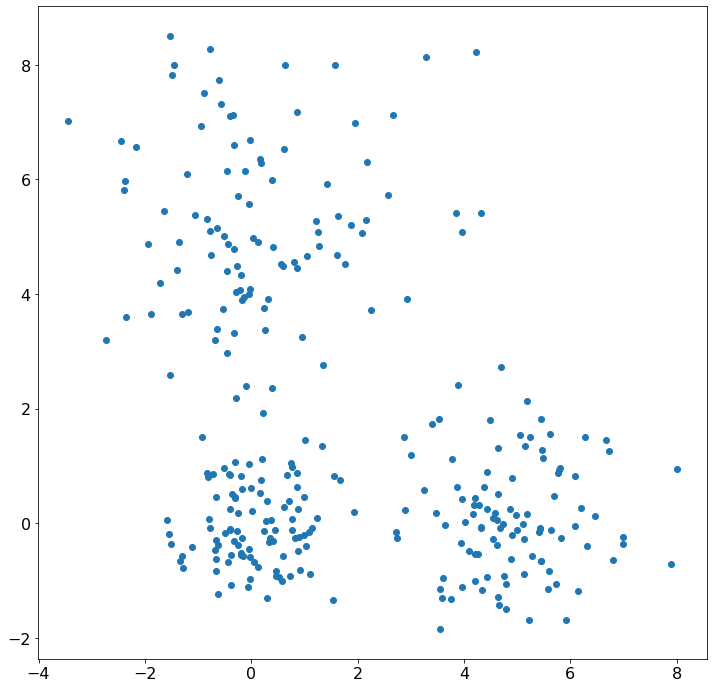

In [5]:
fig,ax = plt.subplots(figsize=(12,12))
ax.scatter(data[:,0], data[:,1])

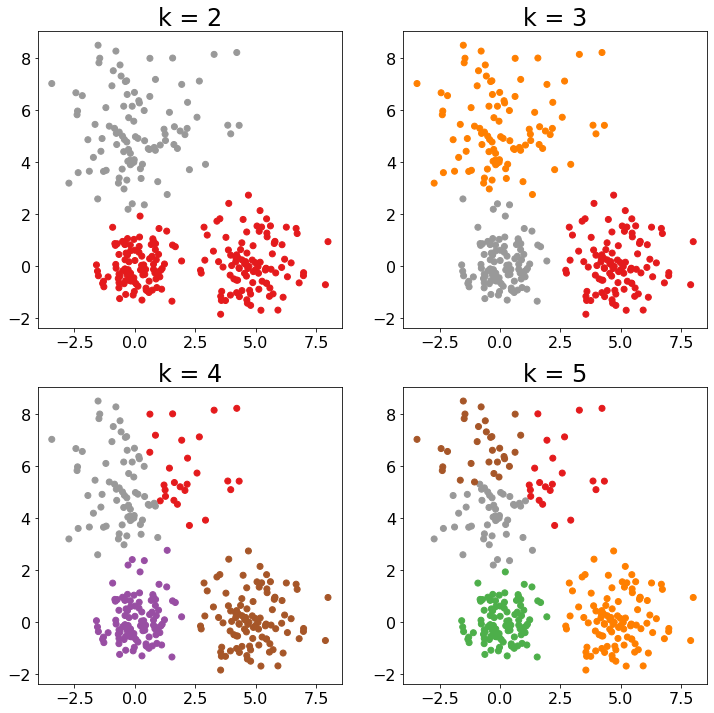

In [7]:
from sklearn.cluster import KMeans
fig, ax = plt.subplots(2,2, figsize = (12,12))

for i, k in enumerate(range(2,6)):
    clustering = KMeans(k).fit(data)
    a = ax[0 if i<2 else 1, i%2] # subplot
    a.scatter(data[:,0], data[:,1], c = clustering.labels_, cmap = 'Set1')
    a.set_title("k = %d" %k)

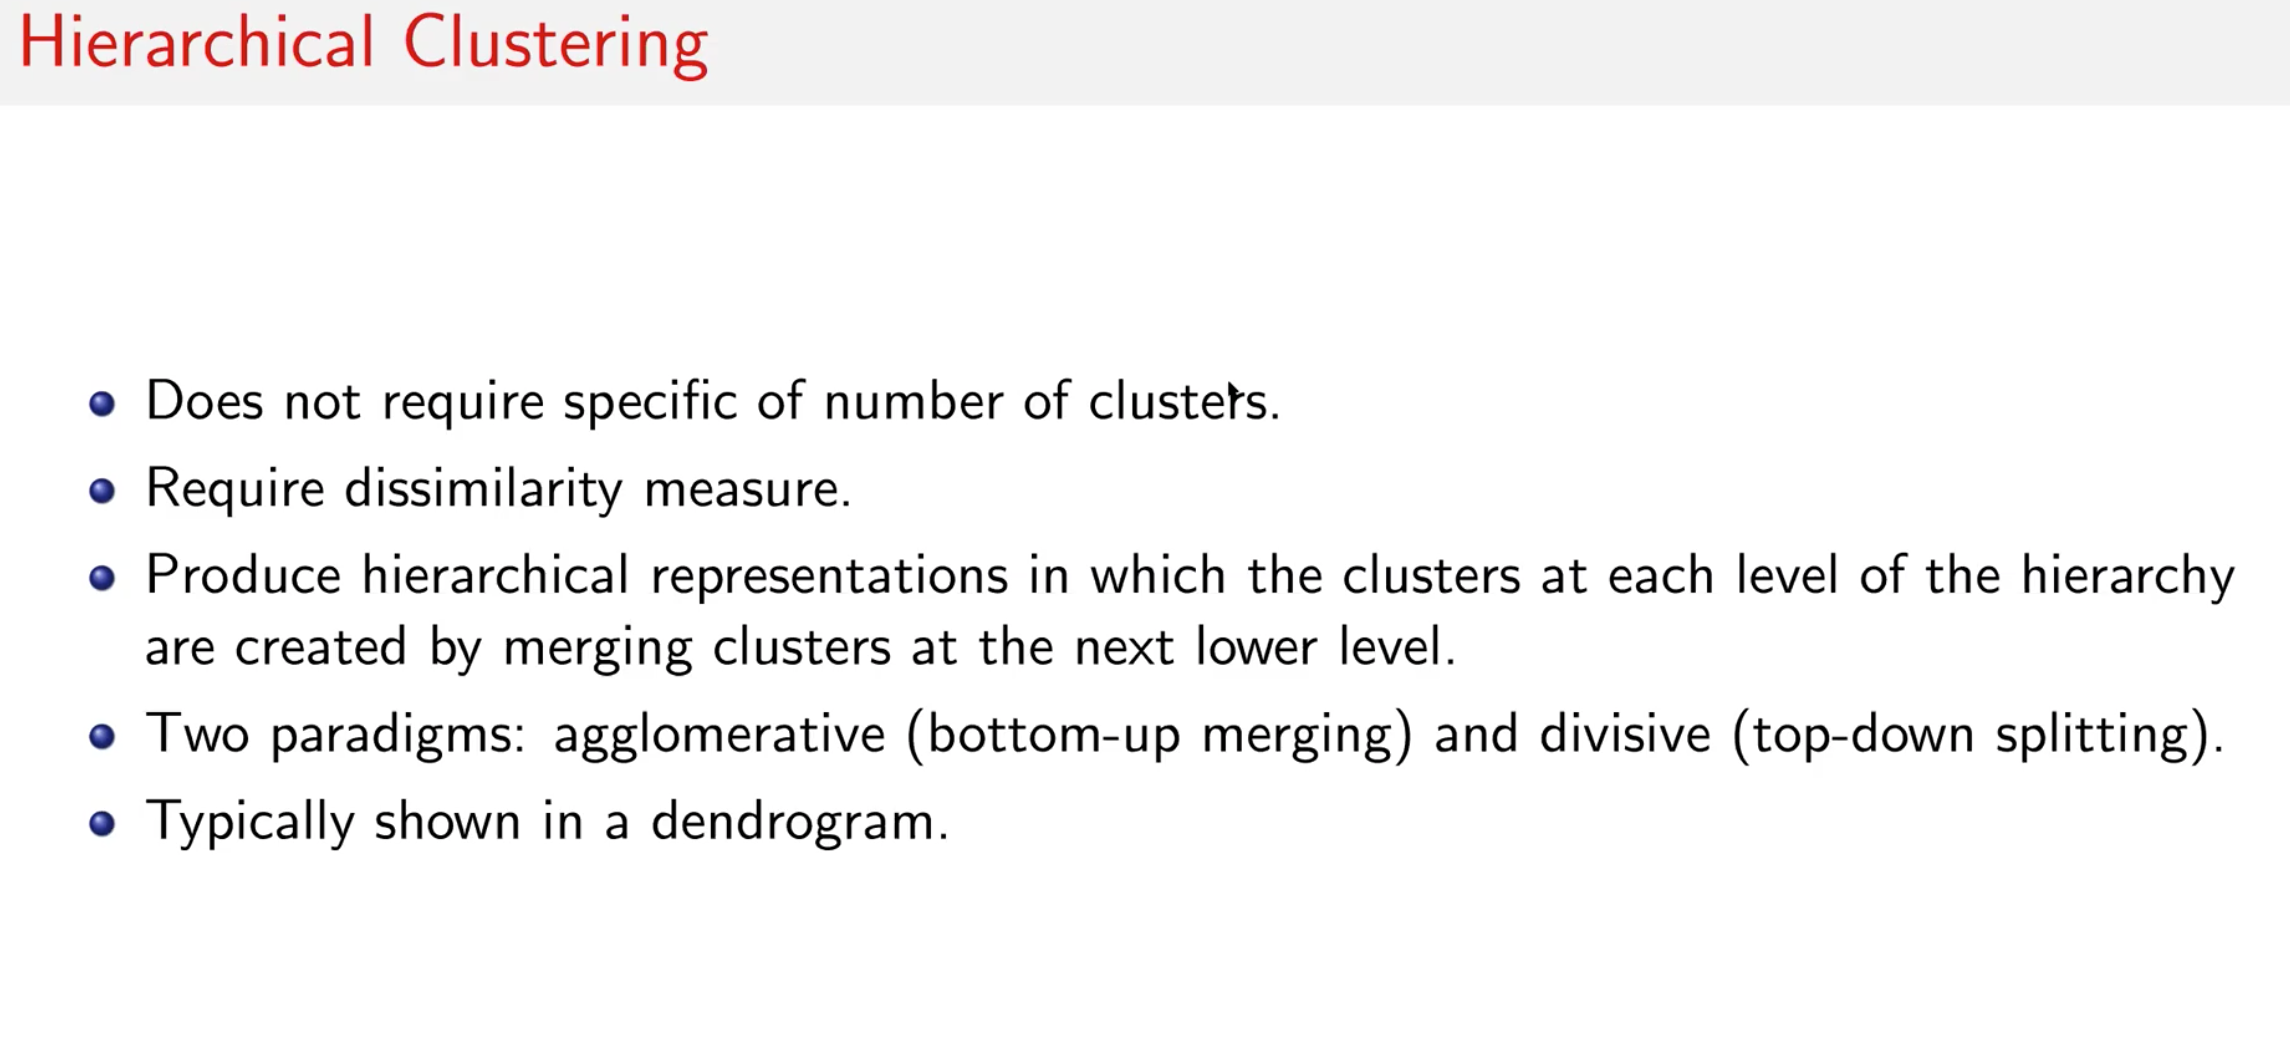

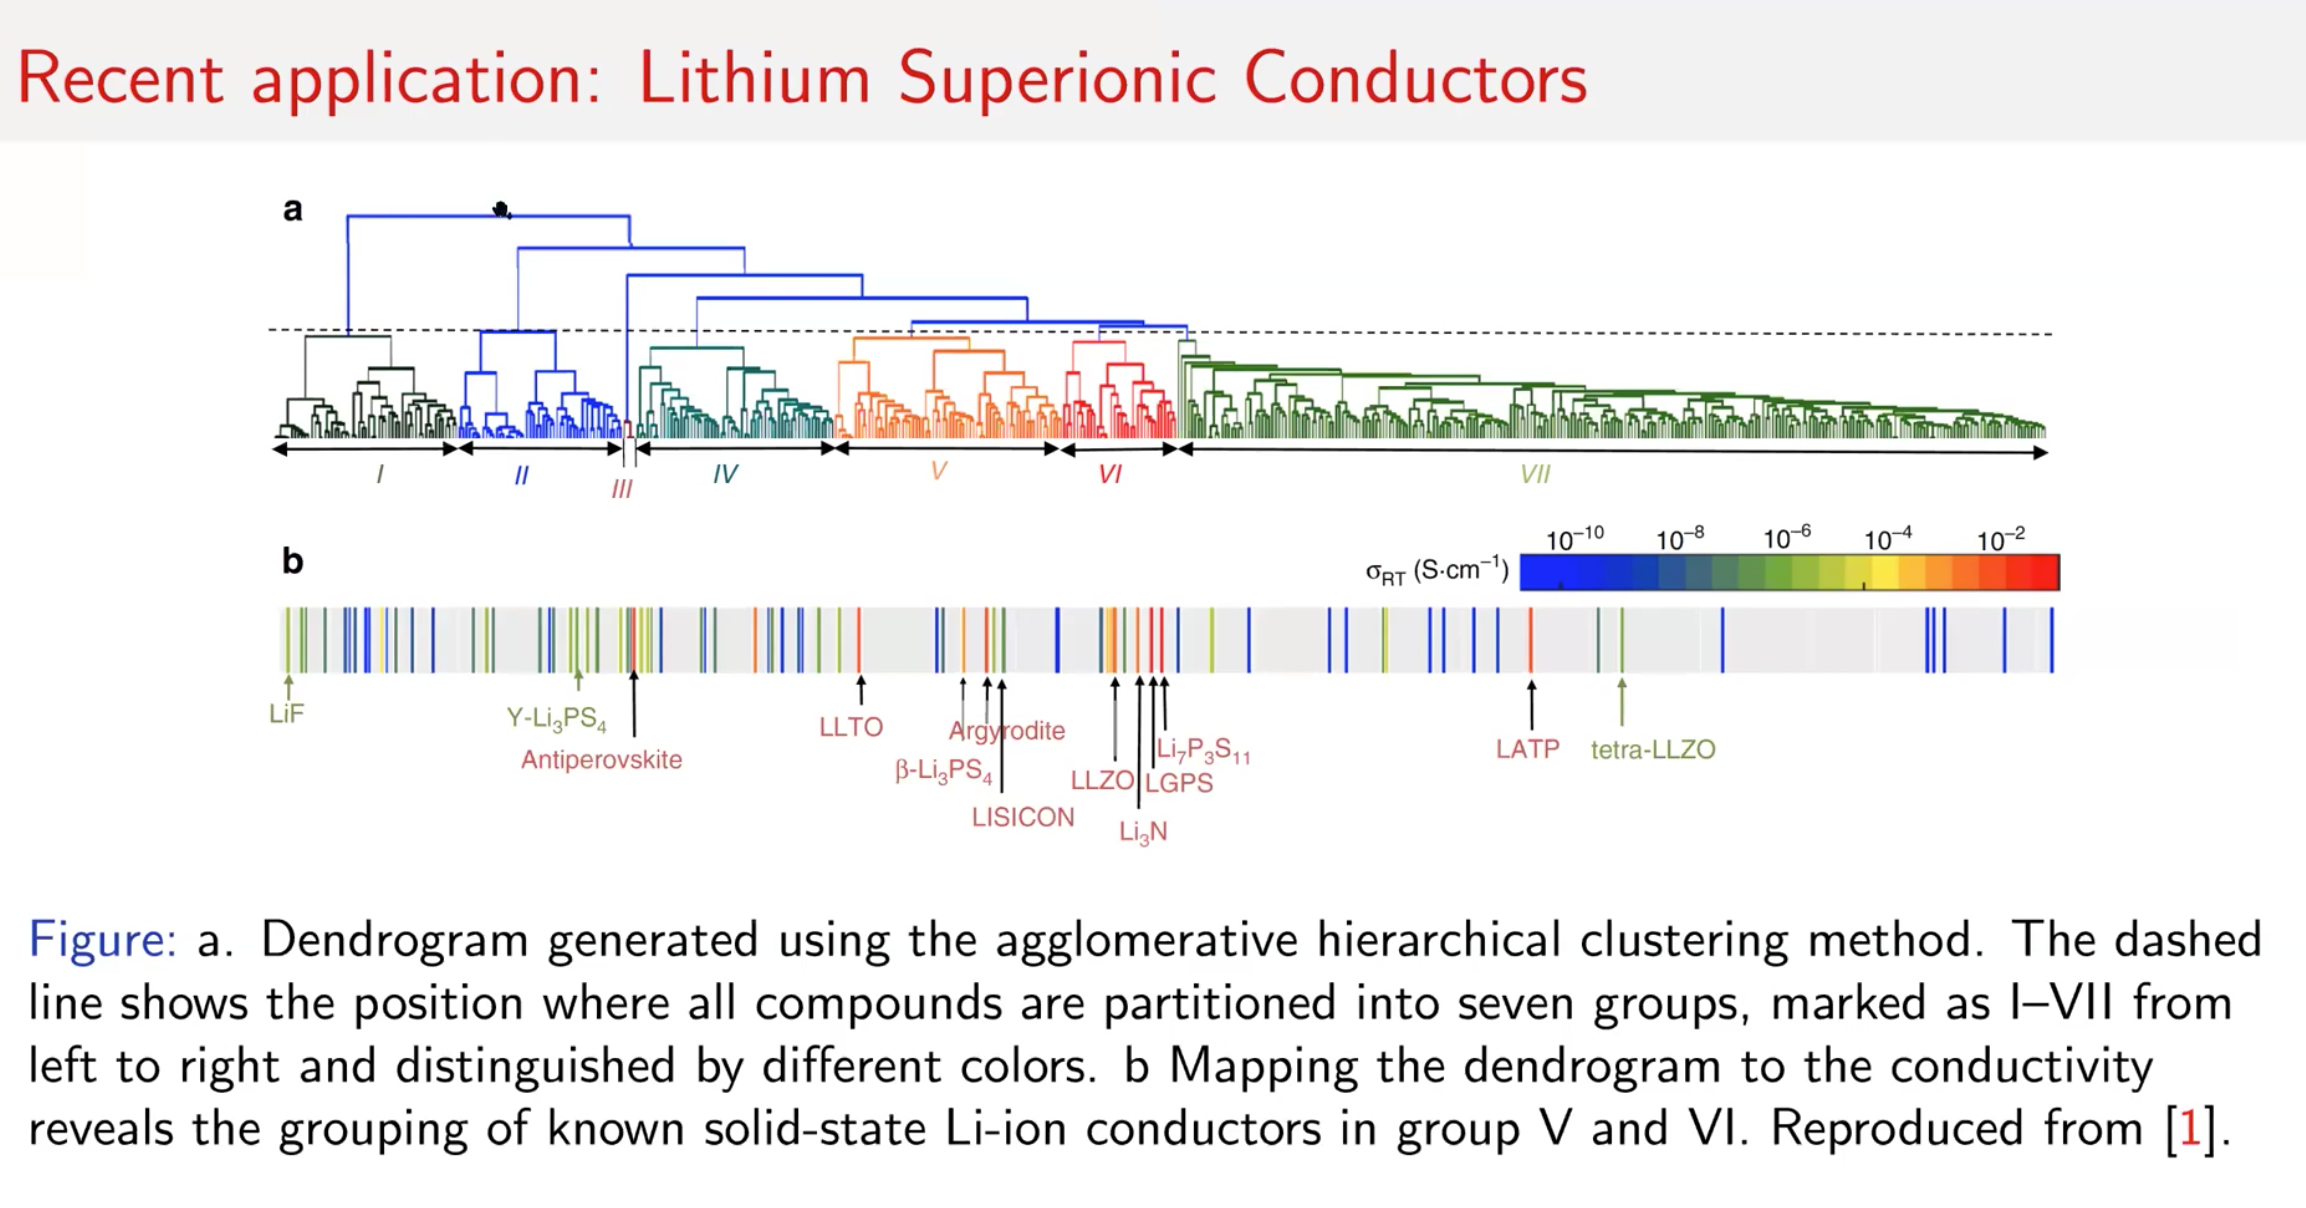

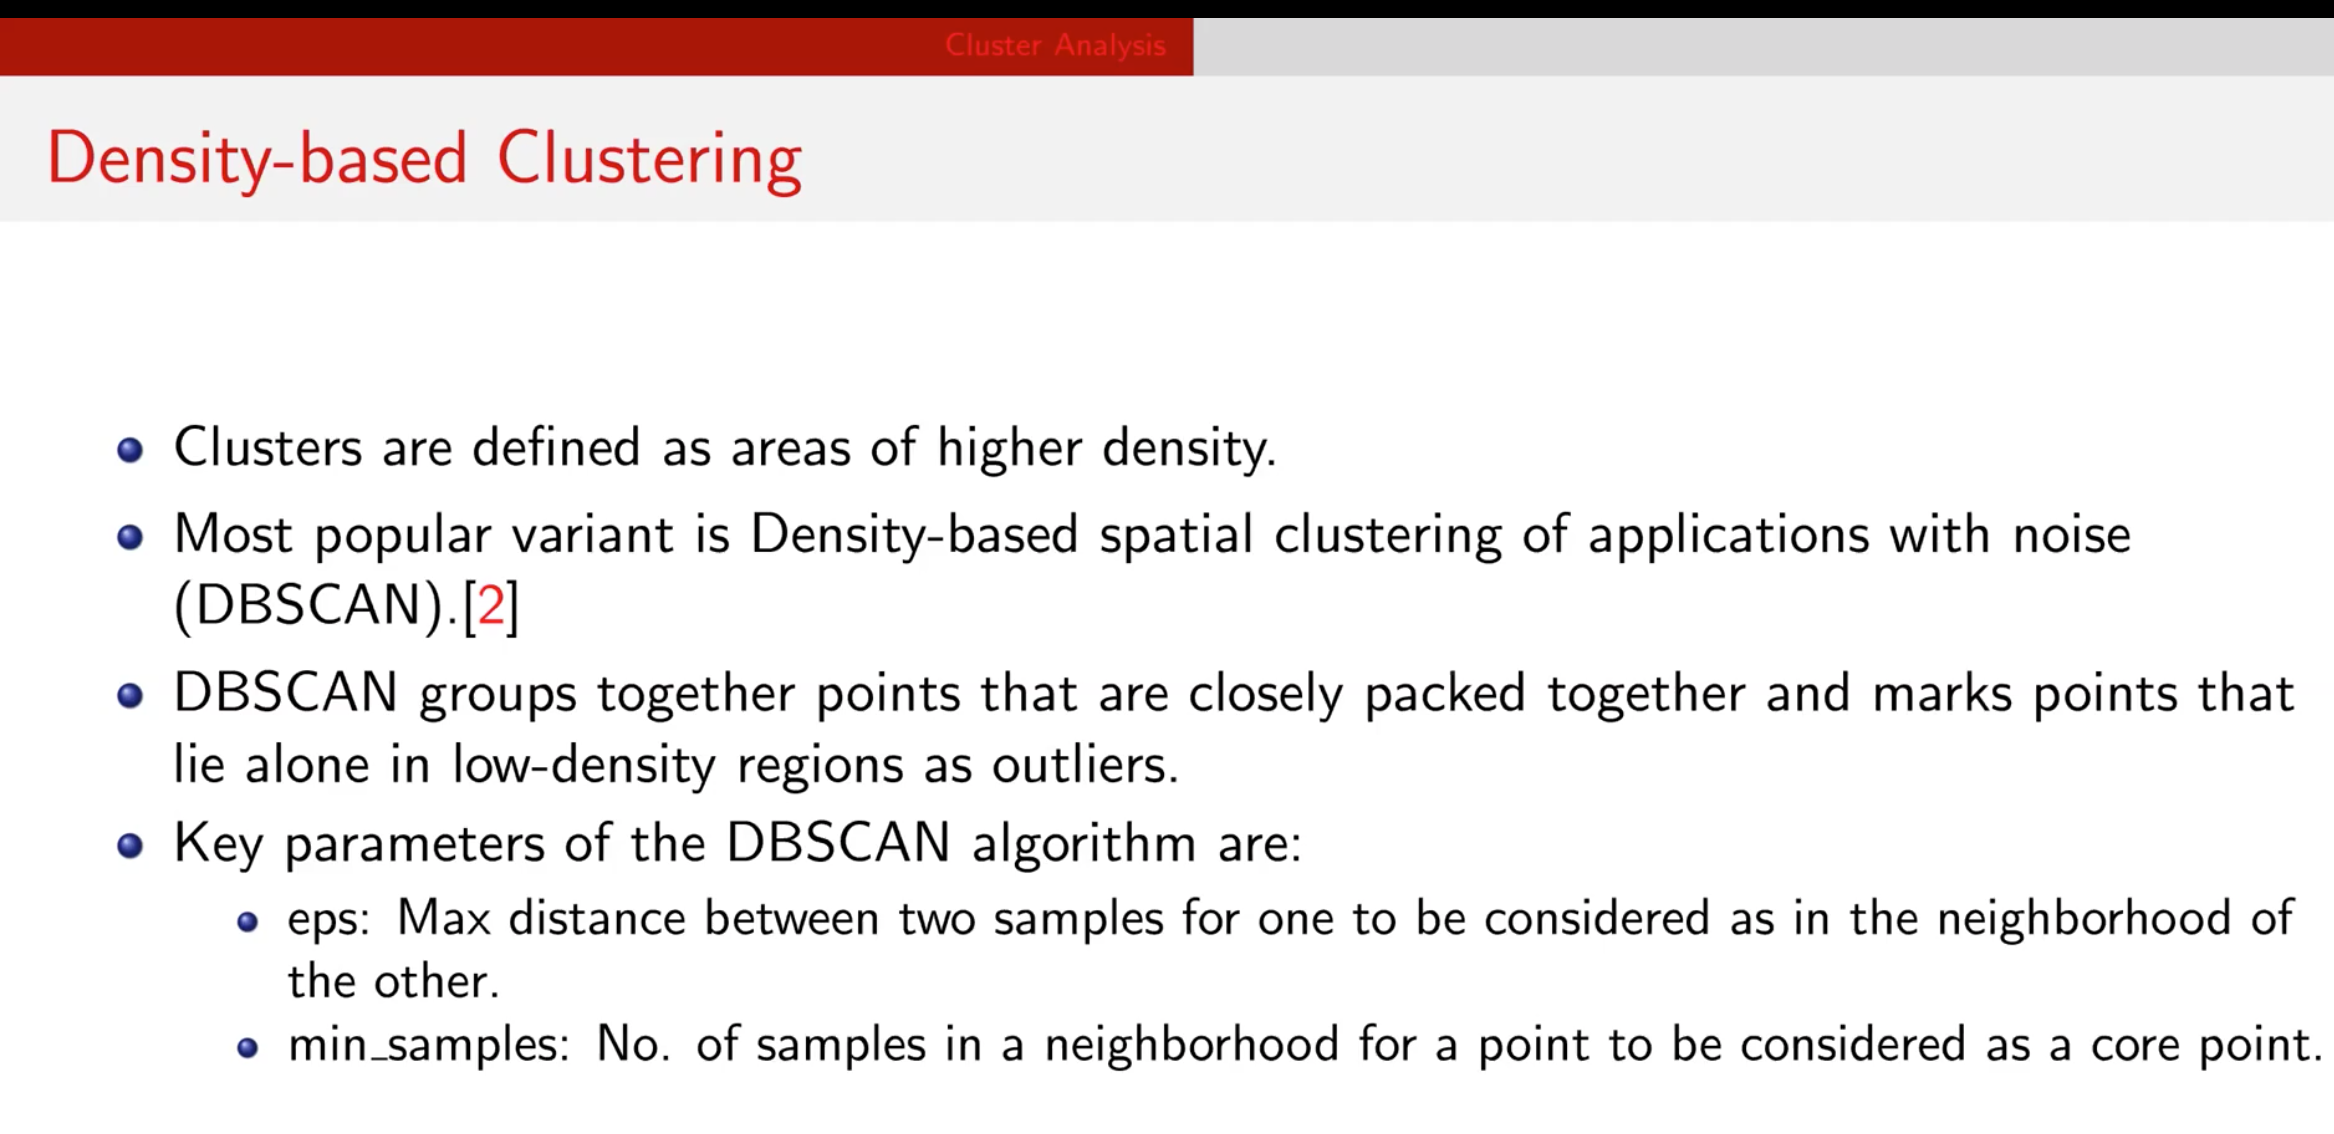

In [11]:
from sklearn.cluster import DBSCAN


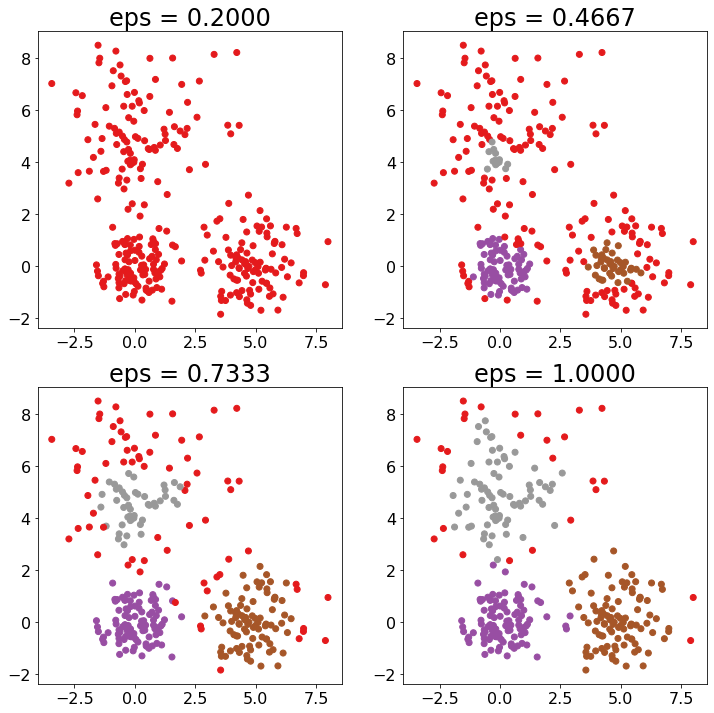

In [16]:
fig, ax = plt.subplots(2,2, figsize = (12,12))

for i, eps in enumerate(np.linspace(0.2, 1, 4)): # generate a series equal distance points
    clustering = DBSCAN(eps = eps, min_samples = 10).fit(data)
    a = ax[0 if i<2 else 1, i%2] # subplot
    a.scatter(data[:,0], data[:,1], c = clustering.labels_, cmap = 'Set1')
    a.set_title("eps = %.4f" %eps)

In [8]:
# K-means and DBSCAN in scikit-learn

# Reading images using matplotlib

from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

# load image as numpy array
data = image.imread('example.png')
data.shape

# Display image
plt.imshow(data)


from sklearn.cluster import kmeans, DBSCAN
clustering = KMeans(k).fit(X)
print(clustering.labels_)
clustering = DBSCAN(eps = 3, min_sample = 2).fix(X)
print(clustering.labels_)

FileNotFoundError: [Errno 2] No such file or directory: 'example.png'

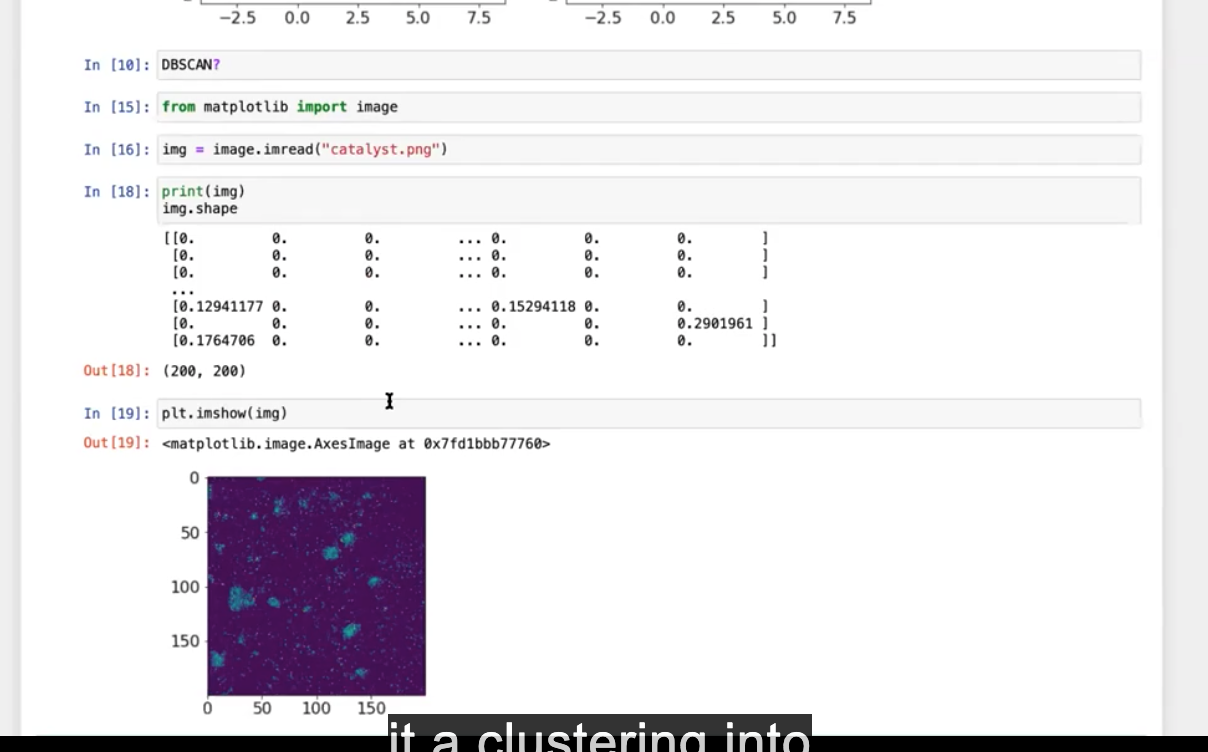

# END

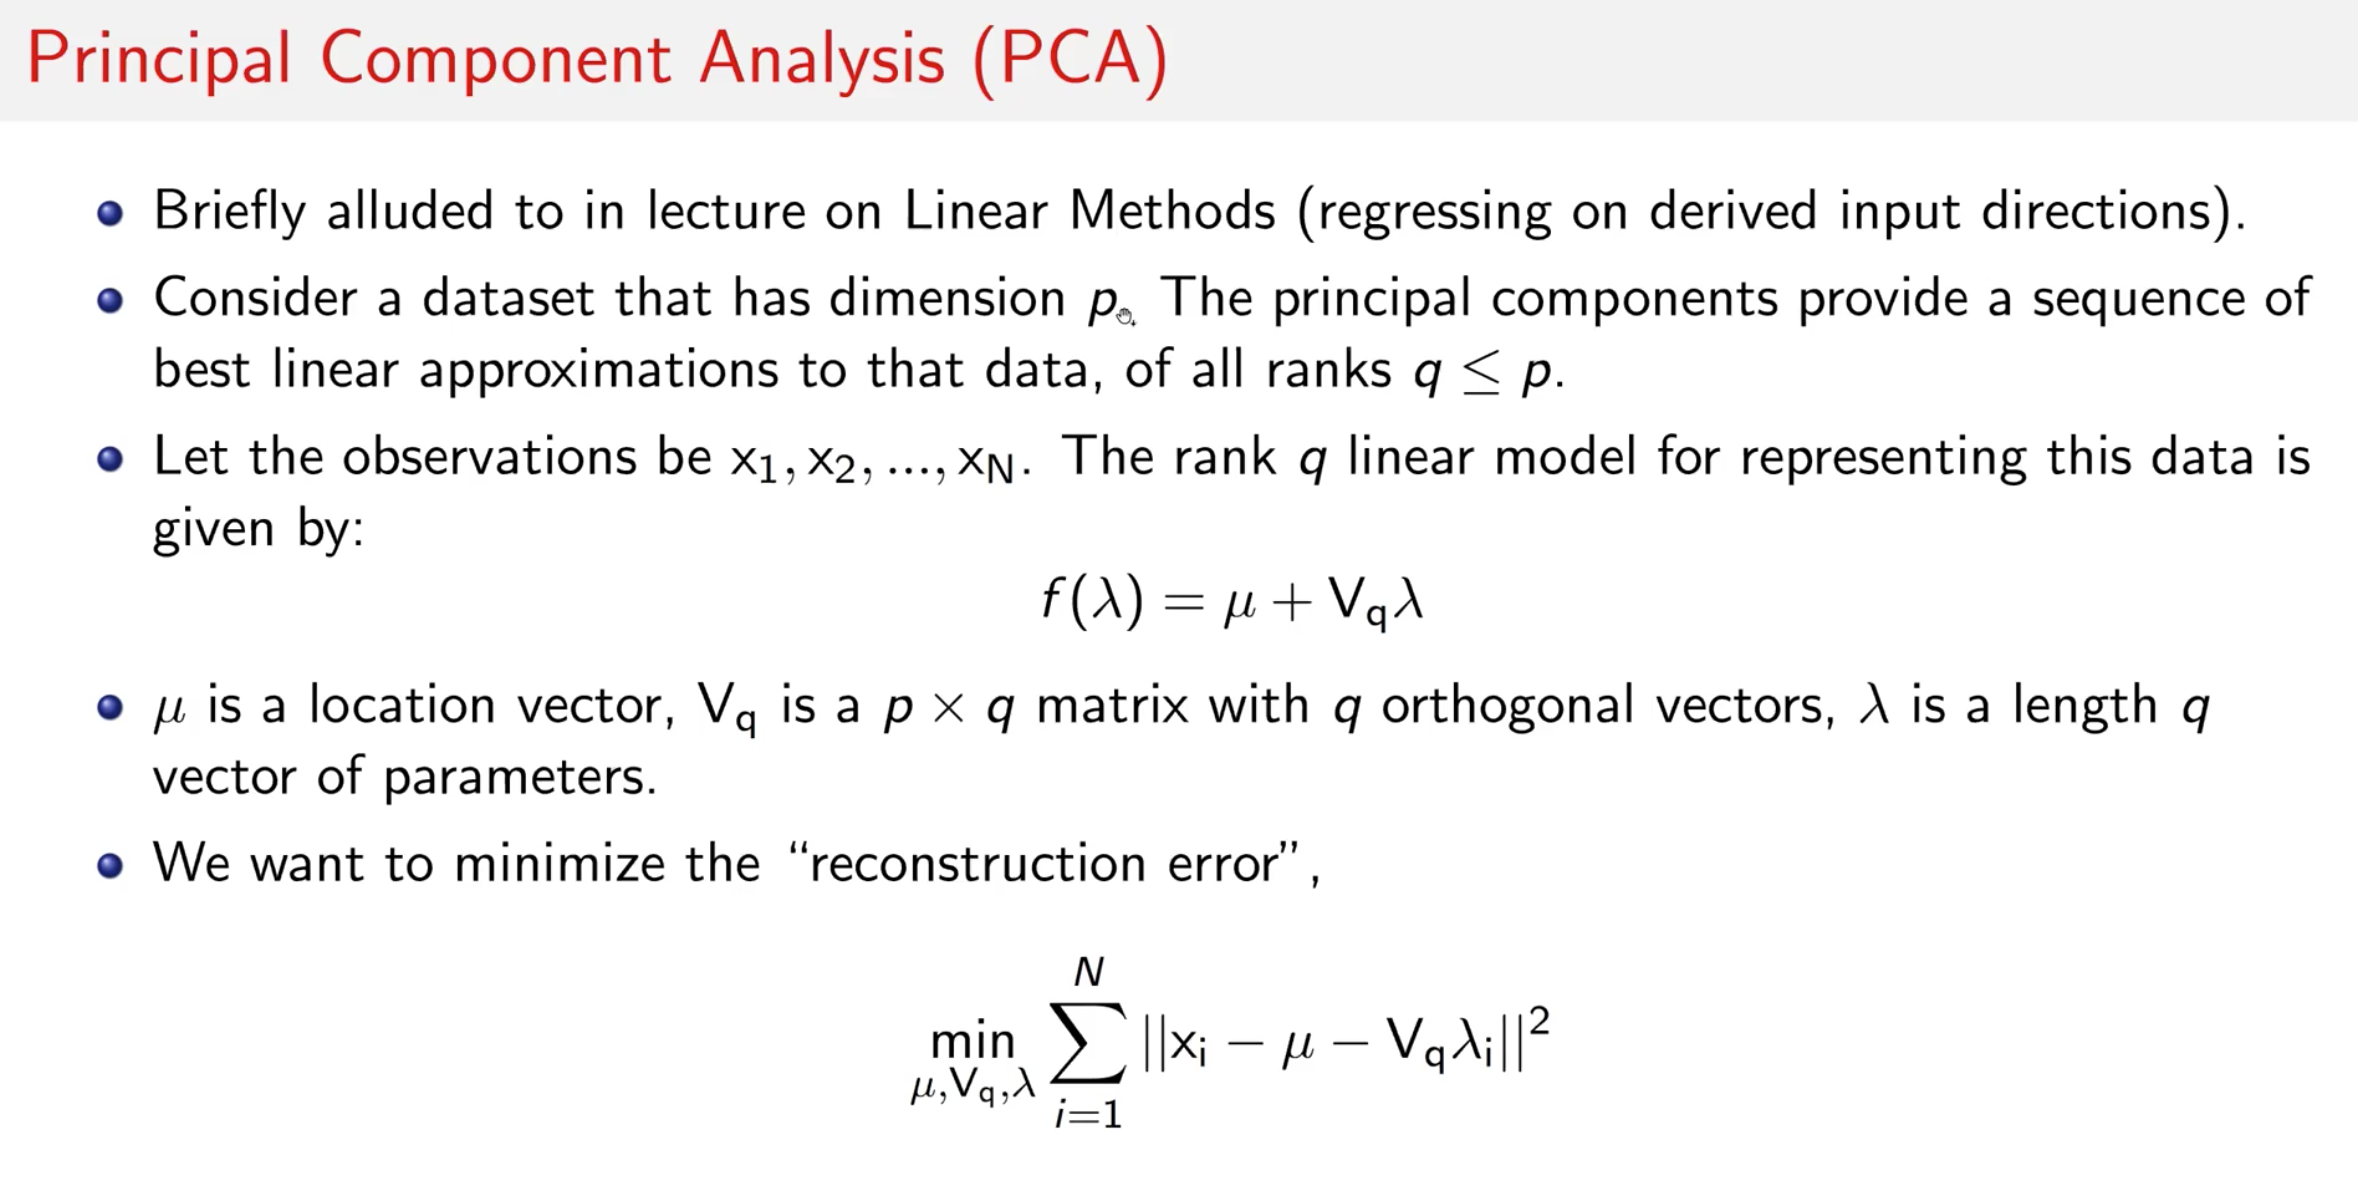

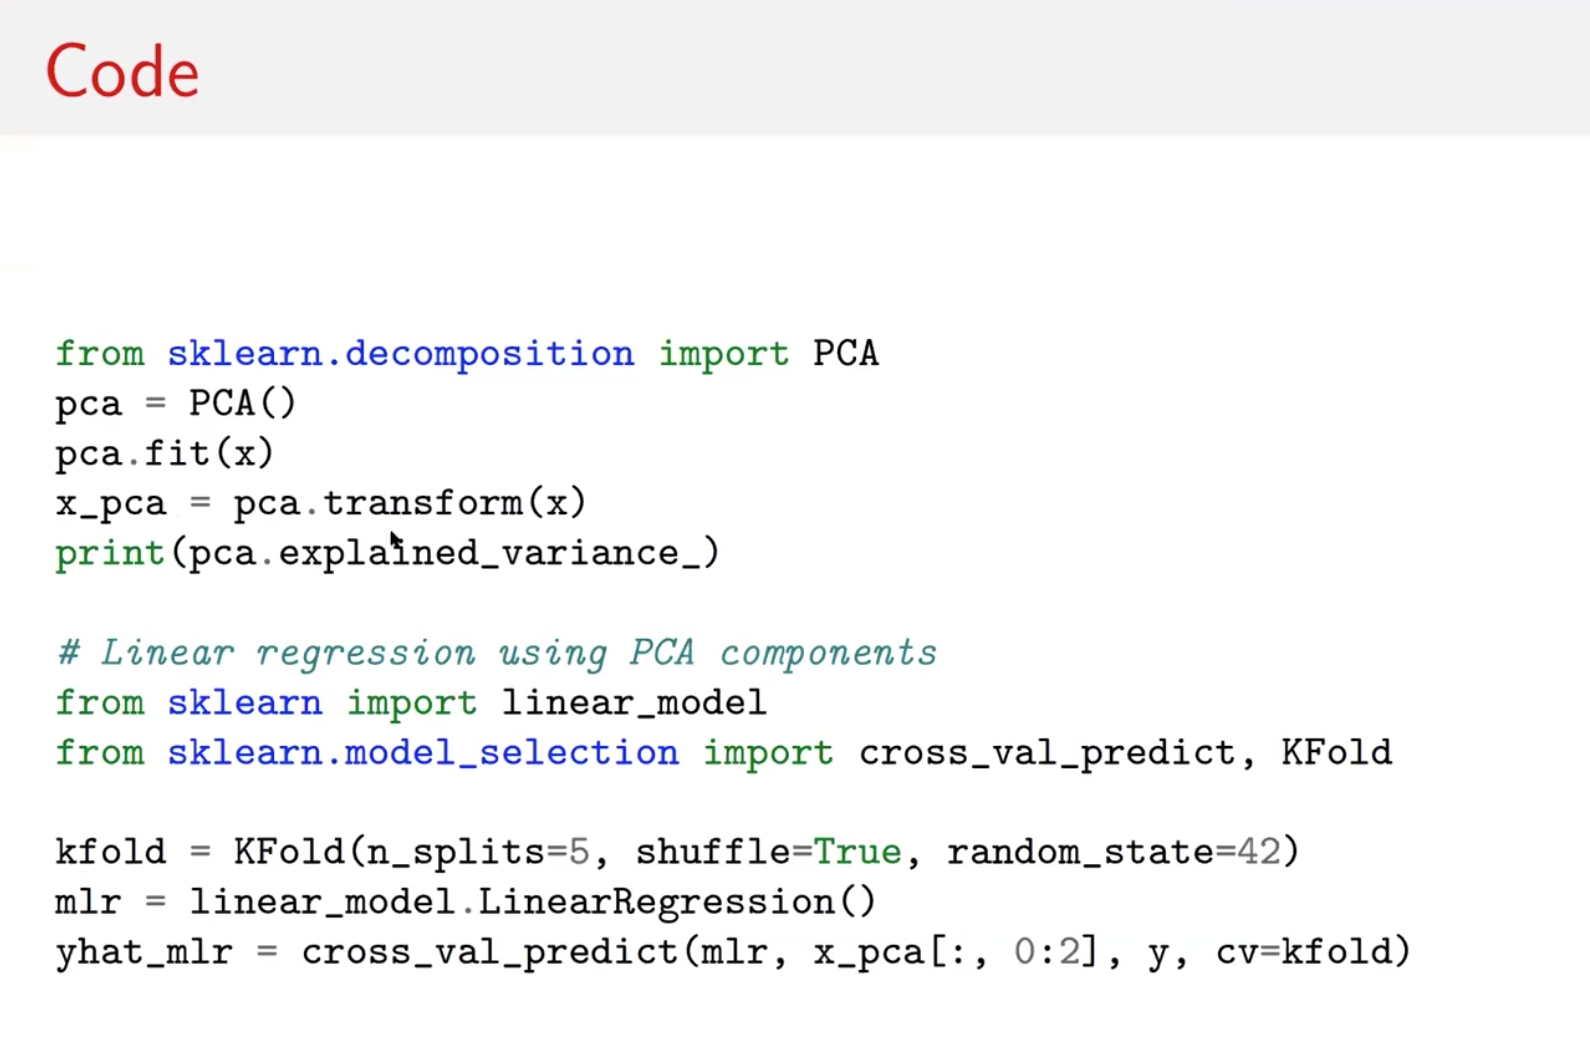

# PCA

In [18]:
data = pd.read_csv('element_data.csv', index_col = 0)
data.head()

K       MP      BP   Z     X     r
Element                                        
Ac        29.0  1323.00  3573.0  89  1.10  1.95
Ag        88.0  1234.93  2435.0  47  1.93  1.60
Al        83.0   933.47  2792.0  13  1.61  1.25
As        40.0  1090.00   887.0  33  2.18  1.15
Au       137.0  1337.33  3129.0  79  2.54  1.35

In [28]:
features = [c for c in data.columns if c != 'K']
x = data[features]
y = data['K']

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
z = scaler.transform(x)

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(z)
z_pca = pca.transform(z)
print(pca.explained_variance_)

[2.48129526 1.66162933 0.70991635 0.12338667 0.08474801]


/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


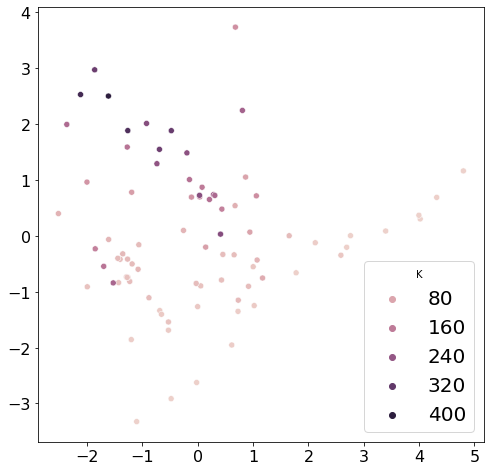

In [31]:
plt.figure(figsize = (8,8))
sns.scatterplot(z_pca[:,0], z_pca[:,1], hue = y)

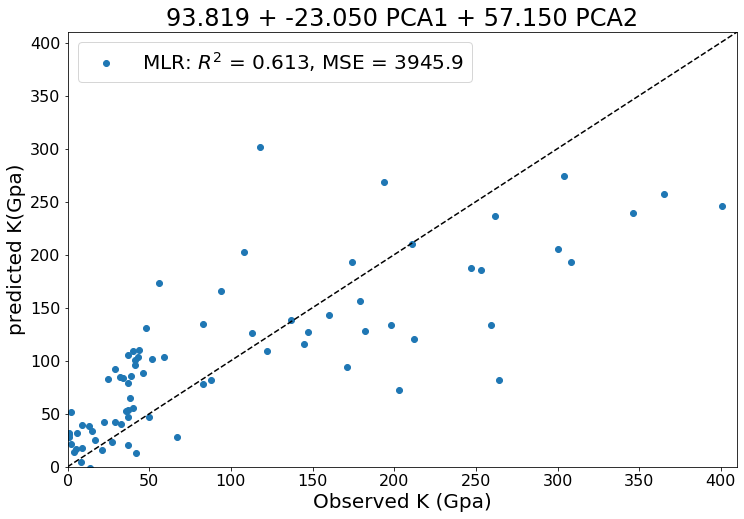

In [36]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

mlr = linear_model.LinearRegression()

yhat_mlr =cross_val_predict(mlr, z_pca[:, 0:2], y, cv = kfold) # 5-fold cv
r2_mlr = r2_score(y, yhat_mlr)
mae_mlr = mean_squared_error(y, yhat_mlr)
label_mlr = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2_mlr, mae_mlr)

f, ax = plt.subplots(figsize=(12, 8))
plt.plot(y,yhat_mlr,'o',label =label_mlr)
plt.ylabel("predicted K(Gpa)")
plt.xlabel("Observed K (Gpa)")
plt.legend()
plt.xlim([0,410])
plt.ylim([0,410])
plt.plot([0,410],[0,410],'k--')

mlr.fit(z_pca[:, 0:2], y)
equation = '%.3f + %.3f PCA1 + %.3f PCA2' % (mlr.intercept_, *mlr.coef_)
plt.title(equation);



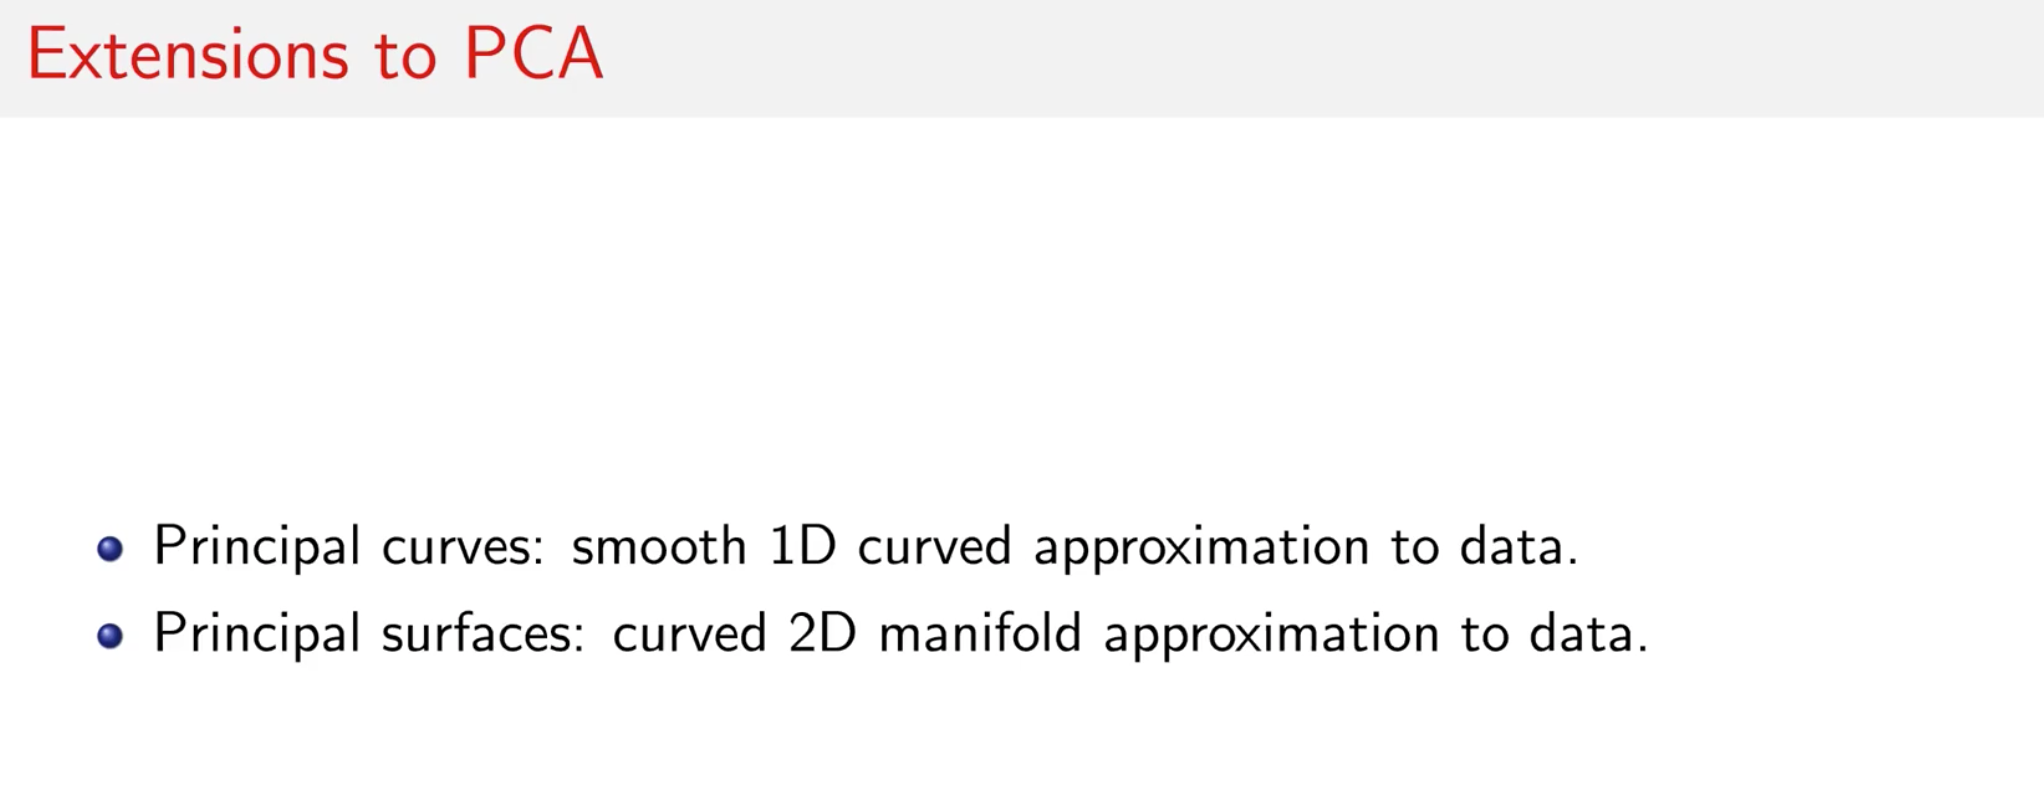

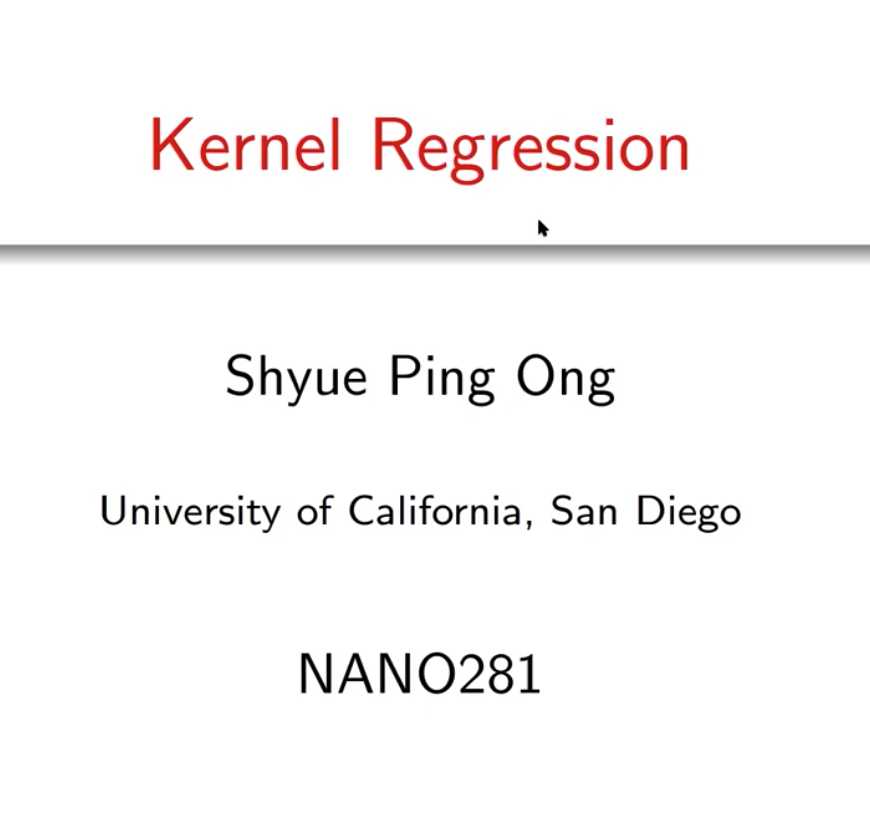

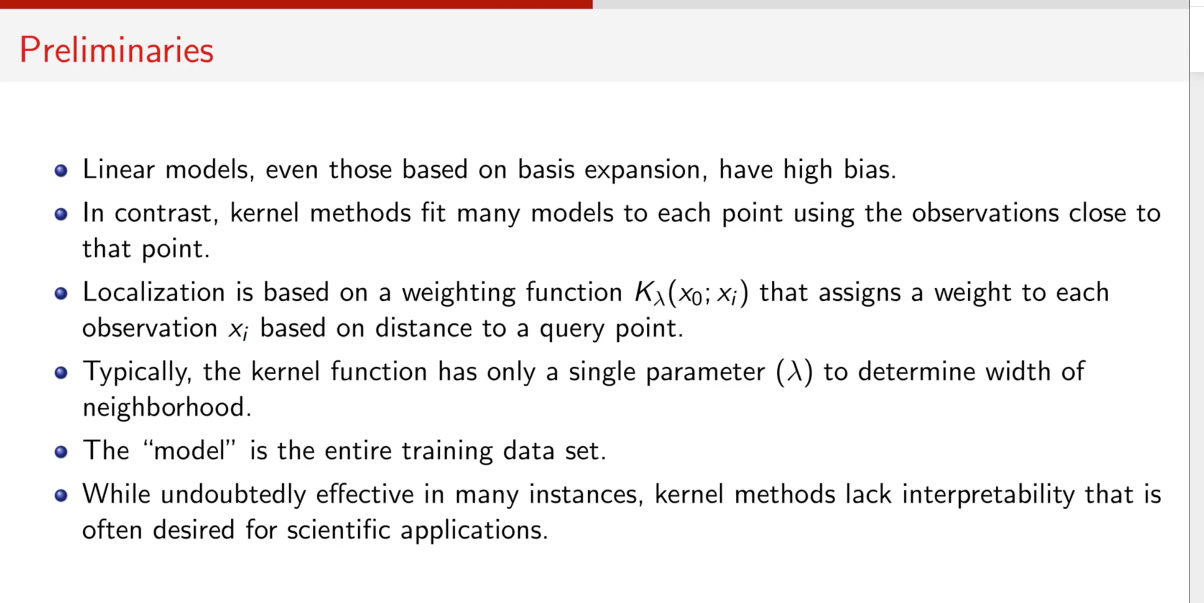

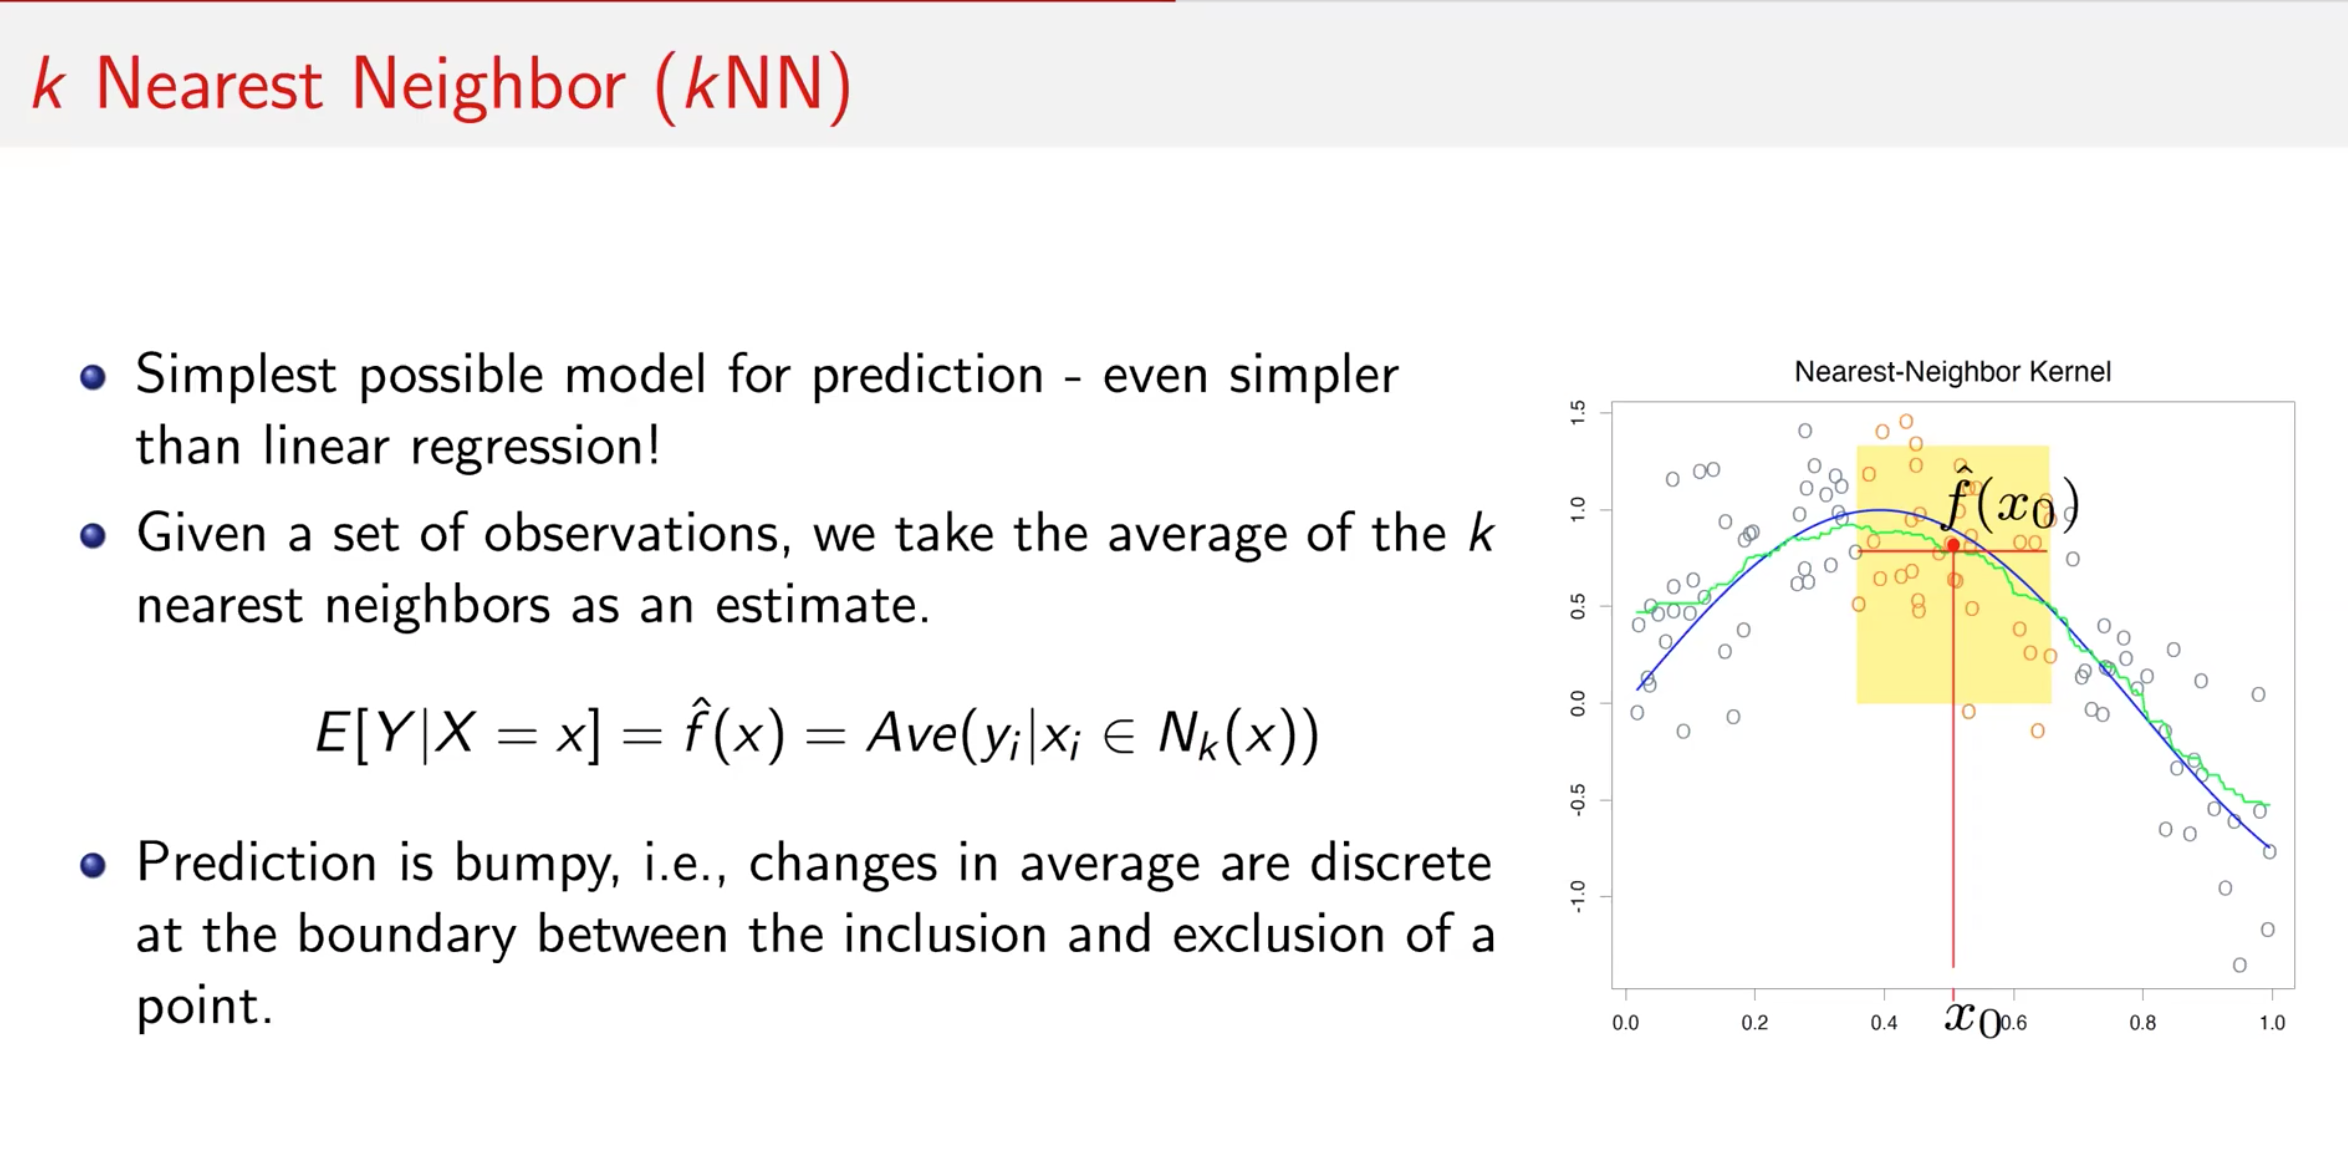